<a href="https://colab.research.google.com/github/Foxyaa/python_lessons/blob/main/kaggle/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%D0%B0_%D0%BD%D0%B0_kaggle1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# from imblearn.over_sampling import SMOTE
# from scipy.stats import zscore
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score

In [ ]:
data = pd.read_csv('/content/train.csv')
#data.isna().count()
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

cats = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

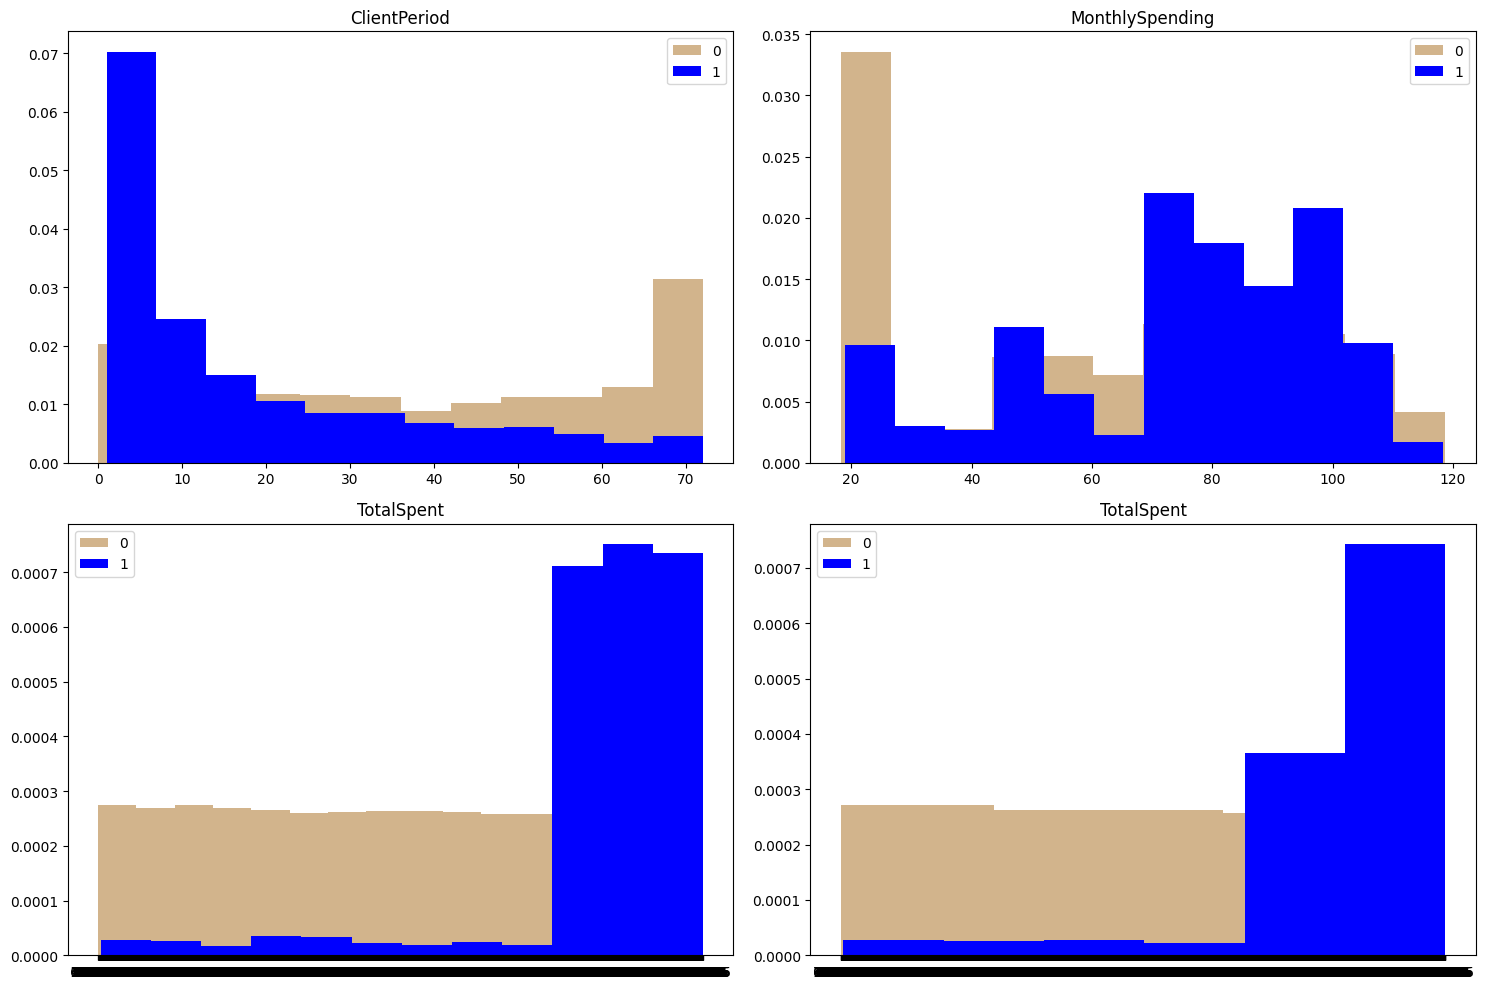

In [ ]:
n_bins = 12
colors = ['tan','blue']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, col in enumerate(num_cols):
    ax = axs[i // 2, i % 2]
    ax.hist(data[data[target_col] == 0][col], bins=n_bins, density=True, histtype='bar', color=colors[0], label='0')
    ax.hist(data[data[target_col] == 1][col], bins=n_bins, density=True, histtype='bar', color=colors[1], label='1')
    ax.legend(prop={'size': 10})
    ax.set_title(col)
ax4 = axs[1,1]
ax4.hist(data[data[target_col] == 0][num_cols[2]], bins=6, density=True, histtype='bar', stacked=True, color=colors[0], label='0')
ax4.hist(data[data[target_col] == 1][num_cols[2]], bins=6, density=True, histtype='bar', stacked=True, color=colors[1], label='1')
ax4.legend(prop={'size': 10})
ax4.set_title(num_cols[2])

plt.tight_layout()
plt.show()

In [ ]:
for c in cat_cols:
  print(data[c].value_counts())

Sex
Male      2655
Female    2627
Name: count, dtype: int64
IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64
HasPartner
No     2705
Yes    2577
Name: count, dtype: int64
HasChild
No     3676
Yes    1606
Name: count, dtype: int64
HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64
HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64
HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64
HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64
HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64
HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64
HasTechSupportAccess
No                     2604
Yes                   

In [ ]:
cat_cols_more2 = []
cat_cols2 = []

label_dict = {}

for c in cat_cols:
    lst = data[c].value_counts().index.tolist()
    if len(lst) > 2:
        cat_cols_more2.append(c)
        label_dict[c] = lst
    else:
        cat_cols2.append(c)
        label_dict[c] = lst
dict = {
    'cat_cols_more2': cat_cols_more2,
    'cat_cols2': cat_cols2,
    'label_dict': label_dict
}
dict

{'cat_cols_more2': ['HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'PaymentMethod'],
 'cat_cols2': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'IsBillingPaperless'],
 'label_dict': {'Sex': ['Male', 'Female'],
  'IsSeniorCitizen': [0, 1],
  'HasPartner': ['No', 'Yes'],
  'HasChild': ['No', 'Yes'],
  'HasPhoneService': ['Yes', 'No'],
  'HasMultiplePhoneNumbers': ['No', 'Yes', 'No phone service'],
  'HasInternetService': ['Fiber optic', 'DSL', 'No'],
  'HasOnlineSecurityService': ['No', 'Yes', 'No internet service'],
  'HasOnlineBackup': ['No', 'Yes', 'No internet service'],
  'HasDeviceProtection': ['No', 'Yes', 'No internet service'],
  'HasTechSupportAccess': ['No', 'Yes', 'No internet service'],
  'HasOnlineTV': ['No', 'Yes', 'No internet service'],
  'HasMovieSubscription': ['

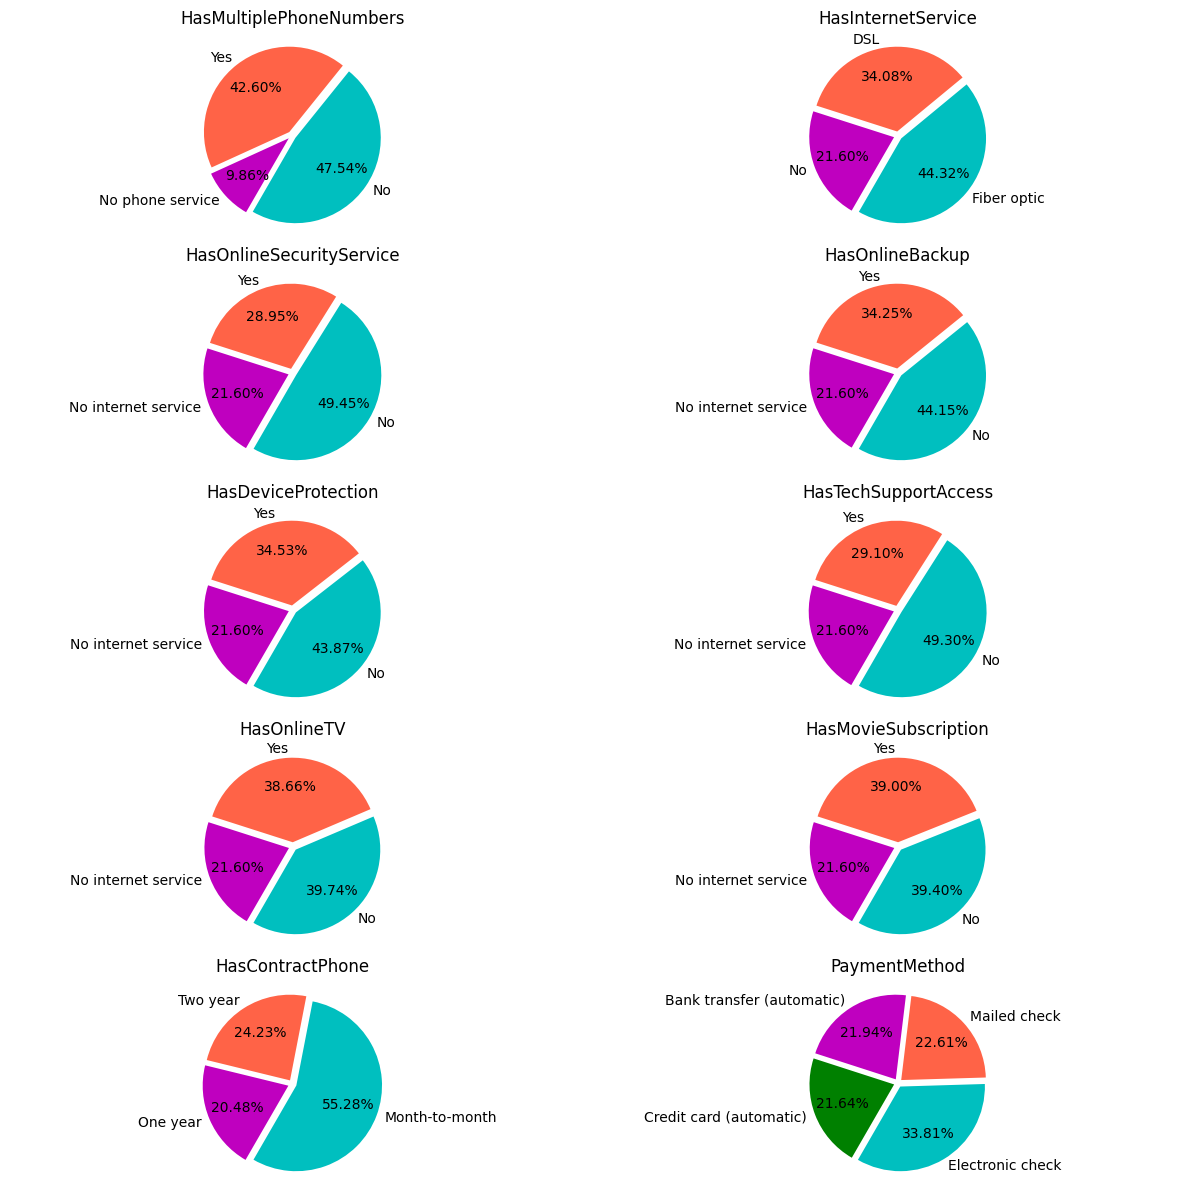

In [ ]:
colors = ['c','tomato','m','g']
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))

for i, col in enumerate(cat_cols_more2):
  ax = axs[i // 2, i % 2]
  labels = dict['label_dict'][col]
  values = data[col].value_counts()
  explode = [0.05] * (len(labels))
  ax.set_title(label = col, fontdict = {"fontsize":12}, pad = 10)
  ax.pie(values, labels = labels, colors = colors, explode = explode, autopct = '%1.2f%%', startangle = 240, textprops={'fontsize':10}, labeldistance=1.1, pctdistance=0.65)#shadow=True,
  ax.axis('equal')
plt.tight_layout()
plt.show()

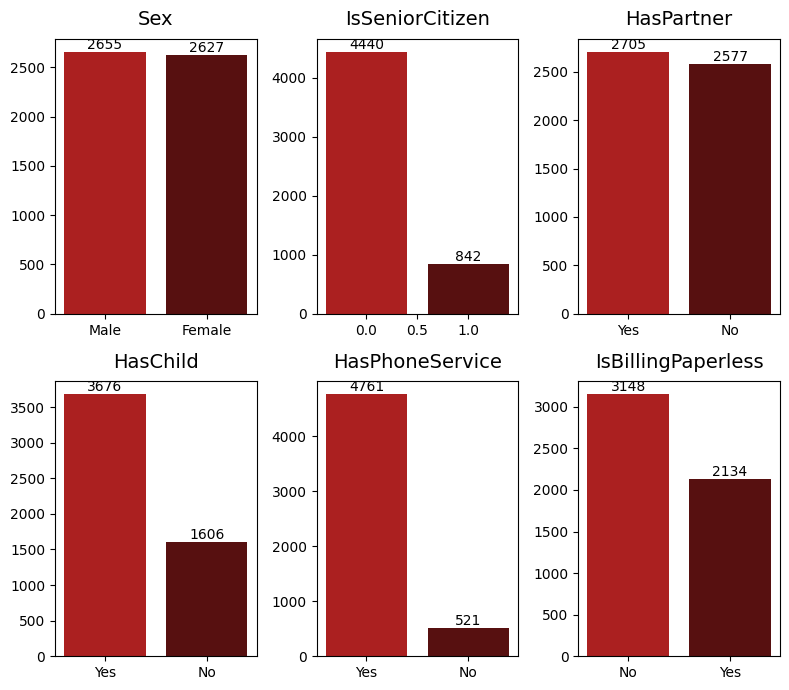

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 7))

for i, col in enumerate(cat_cols2):
    ax = axs[i // 3, i % 3]
    ax.bar(data[col].unique(), data[col].value_counts(), color=['#ab2020','#571010'])#801818
    ax.set_title(label = col, fontdict = {"fontsize":14}, pad = 10)
    for rect in ax.patches:
        ax.annotate(rect.get_height(), (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

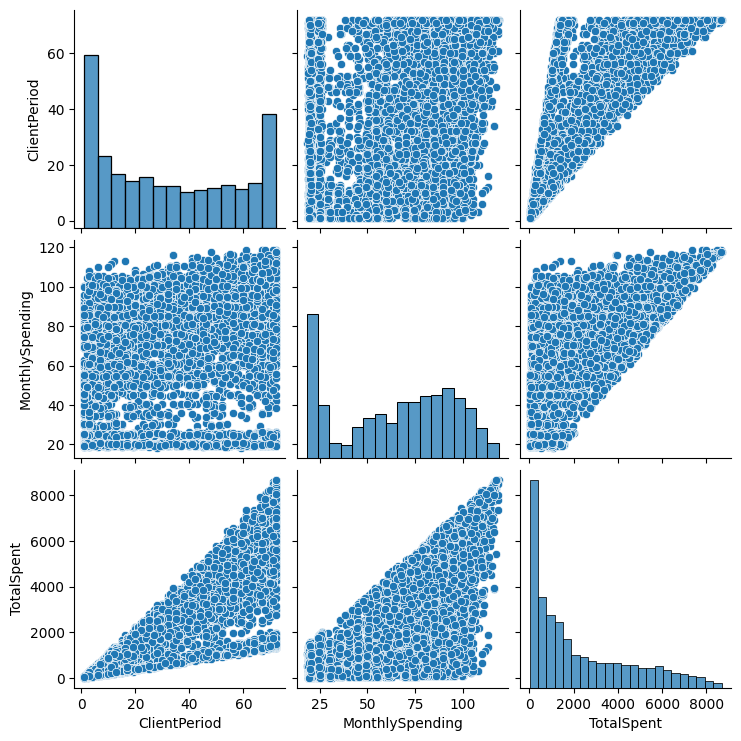

In [ ]:
sns.pairplot(data[num_cols])
plt.show()

# Исходя из графиков, вывод: ?классы несбалансированны?

Коэффициент ранговой корреляции Кендалла, как и метод Спирмена, может применяться для измерения силы взаимосвязи количественных и порядковых категориальных переменных и подходит для анализа нелинейных зависимостей. Это также непараметрический тест.
Конкордантной будет и пара наблюдений, где оба значения в первом наблюдении больше обоих значений во втором.
Если же описанные выше условия не выполняются, то такая пара наблюдений будет называться дискордантной (discordant). К таким наблюдениям относятся, например, наблюдения 4 и 5 (6 > 7, но 7 < 6).

Так вот, коэффициент корреляции Кендалла показывает соотношение конкордантных и дискордантных пар по следующей формуле.

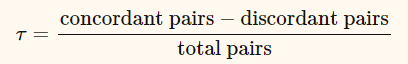

Чем больше доля конкордантных пар, тем больше схожих рангов, а значит сильнее взаимосвязь между переменными.

In [ ]:
data[num_cols].corr(method = 'kendall').round(2)

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.00,0.19,0.73
MonthlySpending,0.19,1.00,0.46
TotalSpent,0.73,0.46,1.00


In [ ]:
data[num_cols].corr(method = 'spearman').round(2)

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.00,0.28,0.89
MonthlySpending,0.28,1.00,0.64
TotalSpent,0.89,0.64,1.00


In [ ]:
correlation_matrix = data[num_cols].corr(method = 'spearman').round(2)
# Отфильтровать пары
filtered_pairs = correlation_matrix.unstack().sort_values().drop_duplicates().reset_index()
filtered_pairs = filtered_pairs[filtered_pairs['level_0'] != filtered_pairs['level_1']]

most_negative_correlation = filtered_pairs.iloc[0]
most_positive_correlation = filtered_pairs.iloc[-1]

# print("Наиболее отрицательная корреляция:")
# print(most_negative_correlation)

print("Наиболее положительная корреляция:")
print(most_positive_correlation)

Наиболее положительная корреляция:
level_0    ClientPeriod
level_1      TotalSpent
0                  0.89
Name: 2, dtype: object


In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'].value_counts()
data['TotalSpent'].isnull().sum()#было 9
data = data.dropna(how='any')
data['TotalSpent'].isnull().sum()#стало 0

0

RobastScaler() использовать, чтобы убрать выбросы

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ]
)
logistic_regression = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(preprocessor, logistic_regression)

param_grid = {'logisticregression__C': [10, 1, 0.1, 0.01, 0.001, 100]}

logReg = GridSearchCV(pipeline, param_grid, scoring='roc_auc')
logReg.fit(data[feature_cols], data[target_col])

best_C = logReg.best_params_['logisticregression__C']
best_C

100

In [ ]:
cv = KFold(n_splits=5)
scores = cross_val_score(logReg, data[feature_cols], data[target_col], cv=cv, scoring='roc_auc')
print('Mean R2 score:', scores.mean())
print('Standard deviation of R2 scores:', scores.std())
print('Best R2 score:', scores.max())

Mean R2 score: 0.8446715344875138
Standard deviation of R2 scores: 0.011065391295281949
Best R2 score: 0.8622576054082904


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(data[feature_cols], data[target_col], train_size = 0.8, random_state = 42)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(x_train, y_train, cat_features=cat_cols)
preds_class = clf.predict(x_valid)
preds_proba = clf.predict_proba(x_valid)
print("class = ", preds_class)
print("proba = ", preds_proba)

Learning rate set to 0.019048
0:	learn: 0.6801499	total: 91.2ms	remaining: 1m 31s
1:	learn: 0.6683861	total: 150ms	remaining: 1m 14s
2:	learn: 0.6574055	total: 189ms	remaining: 1m 2s
3:	learn: 0.6459140	total: 239ms	remaining: 59.4s
4:	learn: 0.6353605	total: 305ms	remaining: 1m
5:	learn: 0.6261610	total: 339ms	remaining: 56.2s
6:	learn: 0.6167841	total: 377ms	remaining: 53.5s
7:	learn: 0.6080311	total: 407ms	remaining: 50.4s
8:	learn: 0.5997483	total: 440ms	remaining: 48.4s
9:	learn: 0.5918432	total: 486ms	remaining: 48.1s
10:	learn: 0.5839242	total: 552ms	remaining: 49.6s
11:	learn: 0.5766678	total: 587ms	remaining: 48.3s
12:	learn: 0.5701751	total: 617ms	remaining: 46.9s
13:	learn: 0.5631203	total: 689ms	remaining: 48.5s
14:	learn: 0.5566815	total: 735ms	remaining: 48.3s
15:	learn: 0.5507060	total: 780ms	remaining: 48s
16:	learn: 0.5449043	total: 827ms	remaining: 47.8s
17:	learn: 0.5390888	total: 883ms	remaining: 48.2s
18:	learn: 0.5338561	total: 934ms	remaining: 48.2s
19:	learn: 0.

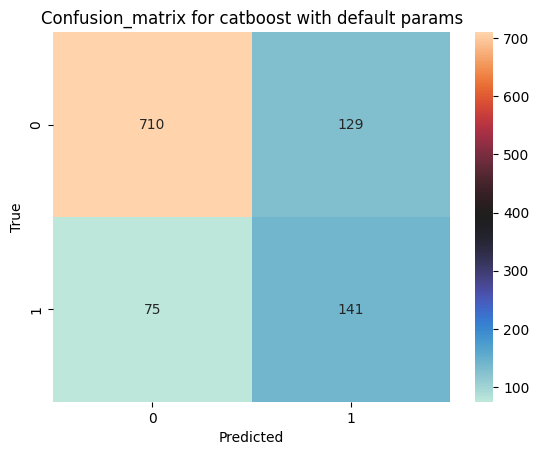

Precision_score =  0.52


In [ ]:
conf_matrix = confusion_matrix(preds_class, y_valid)
sns.heatmap(conf_matrix, annot = True, fmt='d', cmap='icefire')#cmap = 'Blues'
plt.title('Confusion_matrix for catboost with default params')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
precision = precision_score(preds_class, y_valid)
print('Precision_score = ', round(precision,2))

In [ ]:
parameters = {
    'n_estimators': [185, 193, 200, 205, 225, 240],
    'learning_rate': [0.05],
    'depth': [4, 5],
    'l2_leaf_reg': [1, 2],
    'bagging_temperature': [0.6]
}
grid_search = GridSearchCV(
    estimator=CatBoostClassifier(),
    param_grid=parameters,
    scoring='roc_auc',
    cv=4
)

grid_search.fit(x_train, y_train, cat_features=cat_cols)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший AUC:", grid_search.best_score_)


Выходные данные были обрезаны до нескольких последних строк (5000).
9:	learn: 0.5644130	total: 27.1ms	remaining: 474ms
10:	learn: 0.5558880	total: 29.5ms	remaining: 467ms
11:	learn: 0.5481660	total: 32ms	remaining: 462ms
12:	learn: 0.5409425	total: 34.4ms	remaining: 456ms
13:	learn: 0.5337794	total: 37.2ms	remaining: 454ms
14:	learn: 0.5274494	total: 39.8ms	remaining: 452ms
15:	learn: 0.5215827	total: 42.5ms	remaining: 448ms
16:	learn: 0.5160621	total: 45.1ms	remaining: 445ms
17:	learn: 0.5115143	total: 47.8ms	remaining: 444ms
18:	learn: 0.5068437	total: 50.5ms	remaining: 441ms
19:	learn: 0.5013596	total: 52.6ms	remaining: 434ms
20:	learn: 0.4961104	total: 55.1ms	remaining: 430ms
21:	learn: 0.4913401	total: 57.8ms	remaining: 428ms
22:	learn: 0.4874208	total: 60.3ms	remaining: 425ms
23:	learn: 0.4829442	total: 66.3ms	remaining: 445ms
24:	learn: 0.4792086	total: 70.8ms	remaining: 453ms
25:	learn: 0.4754492	total: 73.5ms	remaining: 450ms
26:	learn: 0.4720800	total: 76.4ms	remaining: 447ms

In [ ]:
#Лучшие параметры:
#best_params = {'bagging_temperature': 0.6, 'depth': 4, 'l2_leaf_reg': 2, 'learning_rate': 0.05, 'n_estimators': 200}

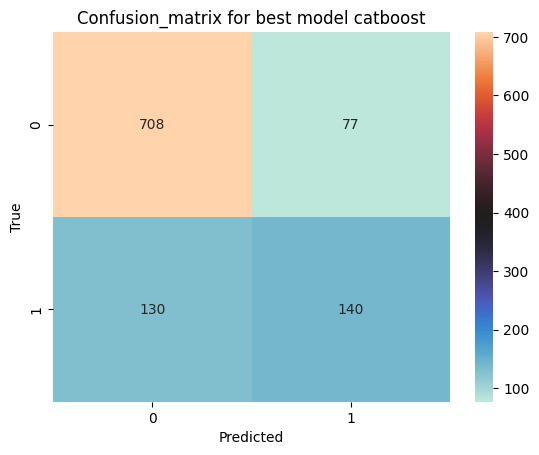

Precision_score =  0.52


In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

pr_class = best_model.predict(x_valid)
pr_proba = best_model.predict_proba(x_valid)

conf_matrix = confusion_matrix(y_valid, pr_class)
sns.heatmap(conf_matrix, annot = True, fmt='d', cmap='icefire')
plt.title('Confusion_matrix for best model catboost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
precision = precision_score(pr_class, y_valid)
print('Precision_score = ', round(precision,2))

In [ ]:
x_test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv')
submission['Churn'] = best_model.predict_proba(x_test)[:, 1]
submission.to_csv('/content/my_submission.csv', index=False)